In [1]:
# Step 1: Install required packages (if needed)
!pip install pandas numpy matplotlib seaborn scikit-learn nltk

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 479.2 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 479.2 kB/s eta 0:00:03
   ------------- -------------------------- 0.5/1.5 MB 479.2 kB/s eta 0:00:03
   -------------------- ------------------- 0.8/1.5 MB 459.5 kB/s eta 0:00:02
   -------------------- ------------------- 0.8/1.5 MB 459.5 kB/s eta 0:00:02
   -----

In [119]:
pip install --upgrade scikit-learn==1.6.1

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Step 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import string
import re

In [2]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to C:\Users\R C
[nltk_data]     KARGETI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\R C
[nltk_data]     KARGETI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\R C
[nltk_data]     KARGETI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Load the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['v1', 'v2']]
df.columns = ['label', 'message']

In [4]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
# Step 4: Preprocess the text
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [6]:
def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Simple tokenization (split by spaces)
    words = text.split()
    # Remove stopwords and lemmatize
    cleaned = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(cleaned)

In [7]:
# Apply the function to the dataset
df['cleaned_message'] = df['message'].apply(clean_text)

In [8]:
# Step 5: Convert labels to binary
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [9]:
# Step 6: Vectorize the text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])

In [10]:
# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)

In [51]:
# Step 8: Train the model
model1 = MultinomialNB()
model1.fit(X_train, y_train)

MultinomialNB()

In [52]:
# Step 9: Evaluate the model
y_pred = model1.predict(X_test)

In [53]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9650224215246637


In [54]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.74      0.85       150

    accuracy                           0.97      1115
   macro avg       0.98      0.87      0.92      1115
weighted avg       0.97      0.97      0.96      1115



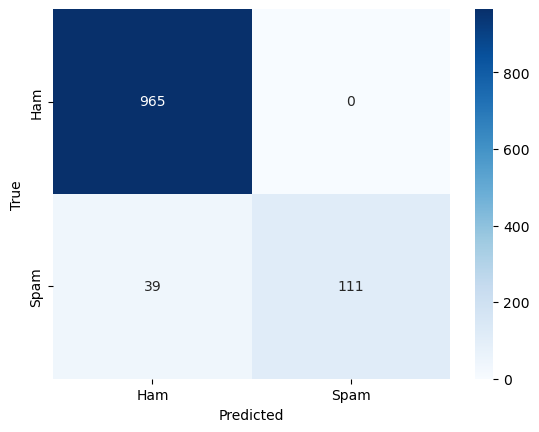

In [55]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [56]:
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [57]:
# Evaluate the model
y_pred = model2.predict(X_test)

In [58]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9479820627802691


In [59]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.64      0.77       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



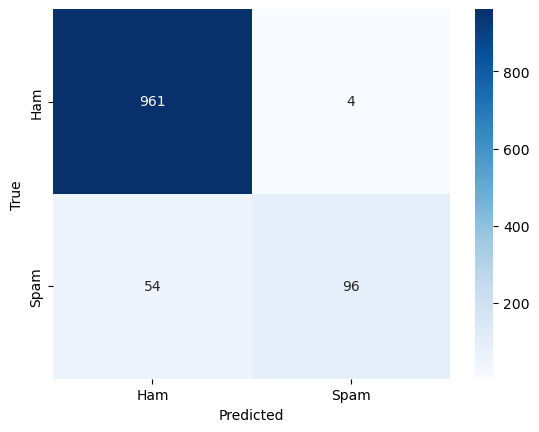

In [60]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [37]:
# First, install XGBoost if you haven't
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.5/150.0 MB 699.0 kB/s eta 0:03:34
   ---------------------------------------- 0.8/150.0 MB 729.2 kB/s eta 0:03:25
   ---------------------------------------- 1.0/150.0 MB 751.1 kB/s eta 0:03:19
   ---------------------------------------- 1.0/150.0 MB 751.1 kB/s eta 0:03:19
   ---------------------------------------- 1.3/150.0 MB 737.4 kB/s eta 0:03:22
   ---------------------------------------- 1.3/150.0 MB 737.4 kB/s eta 0:03:22
   ---------------------------------------- 1.6/150.0 MB 704.7 kB/s eta 0:03:31
   ---------------------------------------- 1.6/150.0 MB 704.7 kB/s eta 0:03

In [61]:
from xgboost import XGBClassifier

model3 = XGBClassifier(eval_metric='logloss')
model3.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [62]:
# Evaluate the model
y_pred = model3.predict(X_test)

In [63]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9748878923766816


In [64]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       0.96      0.85      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



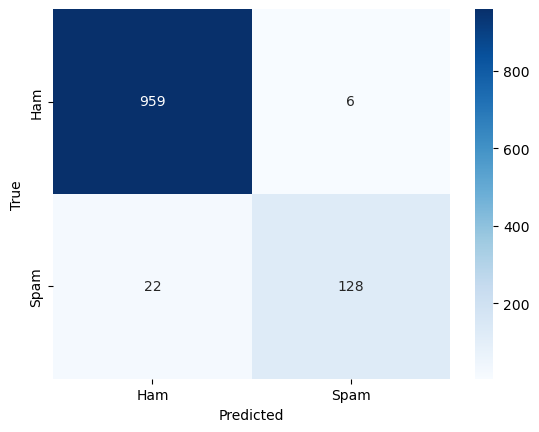

In [65]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [11]:
from sklearn.svm import SVC

# Train the SVM model
model4 = SVC(kernel='linear')  # Using linear kernel for simplicity
model4.fit(X_train, y_train)

SVC(kernel='linear')

In [12]:
# Evaluate the model
y_pred = model4.predict(X_test)

In [13]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9757847533632287


In [14]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.84      0.90       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.98      0.98      0.98      1115



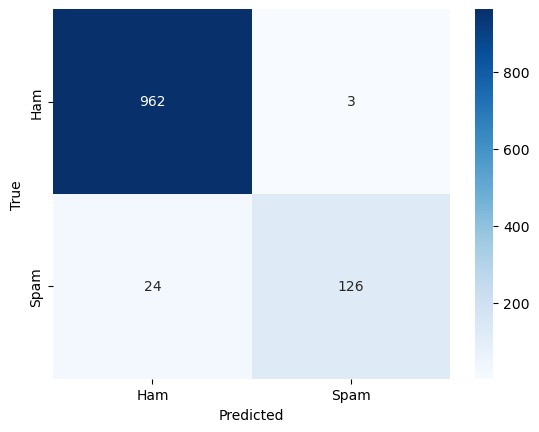

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [83]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
model5 = RandomForestClassifier(n_estimators=100, random_state=42)
model5.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# Evaluate the model
y_pred = model5.predict(X_test)

In [90]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9713004484304932


In [91]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



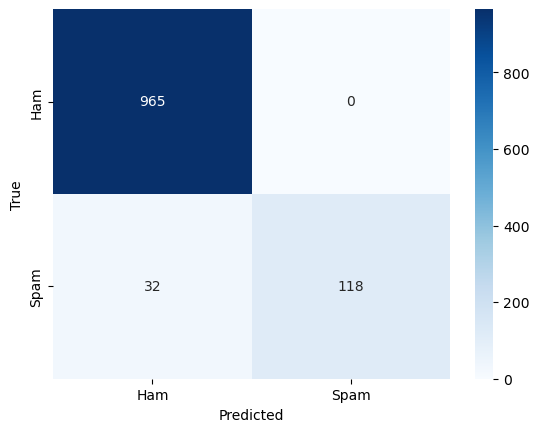

In [92]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [107]:
from sklearn.metrics import accuracy_score

# Predictions
nb_pred = model1.predict(X_test)
lr_pred = model2.predict(X_test)
xgb_pred = model3.predict(X_test)
svc_pred = model4.predict(X_test)
rf_pred = model5.predict(X_test)

# Accuracies
nb_acc = accuracy_score(y_test, nb_pred)
lr_acc = accuracy_score(y_test, lr_pred)
xgb_acc = accuracy_score(y_test, xgb_pred)
svc_acc = accuracy_score(y_test, svc_pred)
rf_acc = accuracy_score(y_test, rf_pred)


In [110]:
# Create the table for model comparison
model_comparison = {
    'Model': ['XGBoost', 'Naive Bayes', 'Logistic Regression', 'Support Vector Machine', 'Random Forest'],
    'Accuracy': [xgb_acc, nb_acc, lr_acc, svc_acc, rf_acc]
}

comparison_df = pd.DataFrame(model_comparison)
# Sort the dataframe by Accuracy in descending order
comparison_df = comparison_df.sort_values(by='Accuracy', ascending=False)

# Reset index to start from 1
comparison_df.index = range(1, len(comparison_df) + 1)

In [111]:
comparison_df

,Model,Accuracy
1,Support Vector Machine,0.975785
2,XGBoost,0.974888
3,Random Forest,0.971300
4,Naive Bayes,0.965022
5,Logistic Regression,0.947982


<H5>SVM ACHIEVED HIGHEST ACCURACY..WILL USE IT FOR FURTHER DEVELOPMENT</H5>

In [16]:
from sklearn.svm import SVC
import joblib

# Train the SVM model with a linear kernel
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(svm_model, 'svm_model.pkl')
print("SVM model saved as svm_model.pkl")

SVM model saved as svm_model.pkl


In [17]:
# Save the vectorizer you used for transforming the input text
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Vectorizer saved as vectorizer.pkl")

Vectorizer saved as vectorizer.pkl
